# Basic working on Data

QUESTION 1

In [54]:
import pandas as pd  
import numpy as np # adding all important libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
import os

In [55]:
data = pd.read_csv('wholesale_customers.csv') #importing the csv file downloaded for further analysis

QUESTION 2

In [56]:
data.head() #to find the 5 data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


QUESTION 3

In [57]:
data.shape

(440, 9)

QUESTION 4

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [59]:
data.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

there are no missing values


QUESTION 5

In [60]:
dupes = data.duplicated()
sum(dupes)

0

no duplicates

QUESTION 6

In [61]:
pd.DataFrame(data.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Buyer/Spender,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicatessen,0


In [62]:
data.isnull().values.any()

False

In [63]:
data.isnull().sum().sum()

0

No missing values to be replaced

## UNIVARIATE ANALYSIS

QUESTION 7

a.)

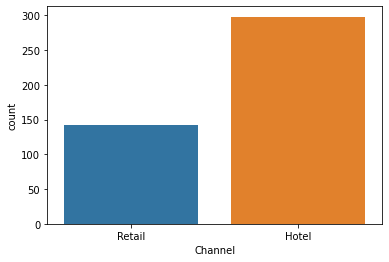

In [64]:
ax = sns.countplot(x='Channel', data=data)

There are two categories of customers in channel i.e, hotei and Retail.This count plot shows the number of customers for both categorical variables.The sale is highest for Hotel

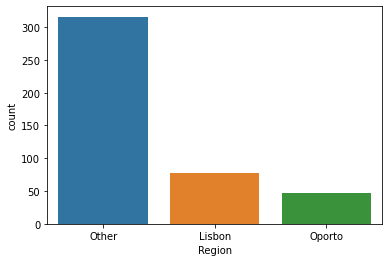

In [65]:
ax = sns.countplot(x='Region', data=data)

There are three geographical region that are involved.From the above plot we see the customer distrubution area wise in Portugal.
The highest count is in all the other regions in Portugal, 2nd heighest in Lisbon and the least in Oporto

counter plot for Region & Channel

b.)

<AxesSubplot:xlabel='Milk', ylabel='Density'>

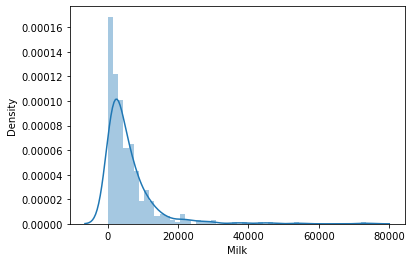

In [66]:
sns.distplot(data['Milk'])

This is a distribution plot for milk(continuous Variable).This positively skewed and left tailed.
This plot shows that the left side has large number of data values is clusttered and lower data on the right side.
The large spends amount on milk id between 0 to 20000.

<AxesSubplot:xlabel='Fresh', ylabel='Density'>

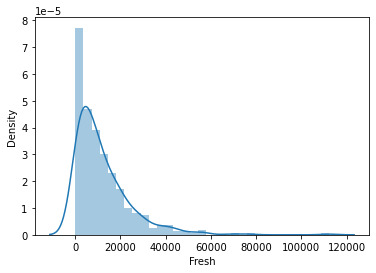

In [67]:
sns.distplot(data['Fresh'])

This is a distribution plot for fresh products ordered.This plot is positively skewed.The amount of fresh products ordered are betweeen 0 to almost 60000.Maximum data is clustered in this region

<AxesSubplot:xlabel='Grocery', ylabel='Density'>

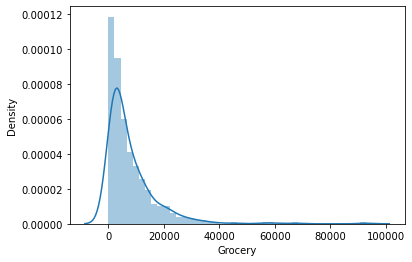

In [68]:
sns.distplot(data['Grocery'])

This a distribution plot for Grocery.This distribution shows the amount spent on the grocery which is positively skewed.The count of customer might not be very large but a lot people seem to buy within the range of 40000.

<AxesSubplot:xlabel='Frozen', ylabel='Density'>

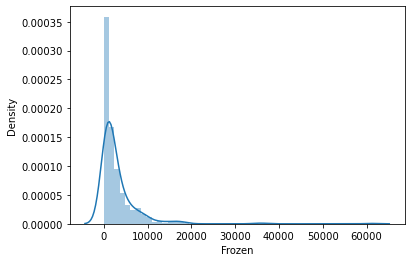

In [69]:
sns.distplot(data['Frozen'])

This is a distribution plot for frozen products.From the above plot we can see that not many customer are going for frozen items.This plot is positively skewed and maximum customers are clustered between 0 to 20000

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Density'>

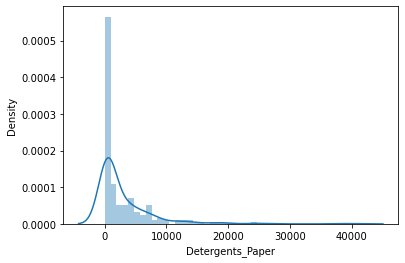

In [70]:
sns.distplot(data['Detergents_Paper'])

This is a positively skewed plot and from the graph we infer that very few customer spend on detergent-paper and distribution of these customers are between 0 to 10000

<AxesSubplot:xlabel='Delicatessen', ylabel='Density'>

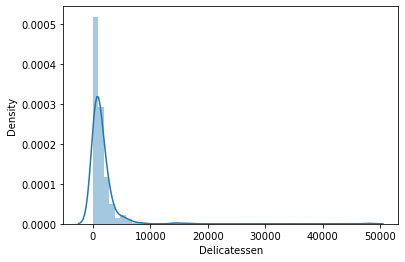

In [71]:
sns.distplot(data['Delicatessen'])

The customer count is high from the above graph, which means a lot of customer buy these products.This plot is positively skewed and left tailed.
The amount spent on these items are between 0 to 10000.

c.)

<AxesSubplot:>

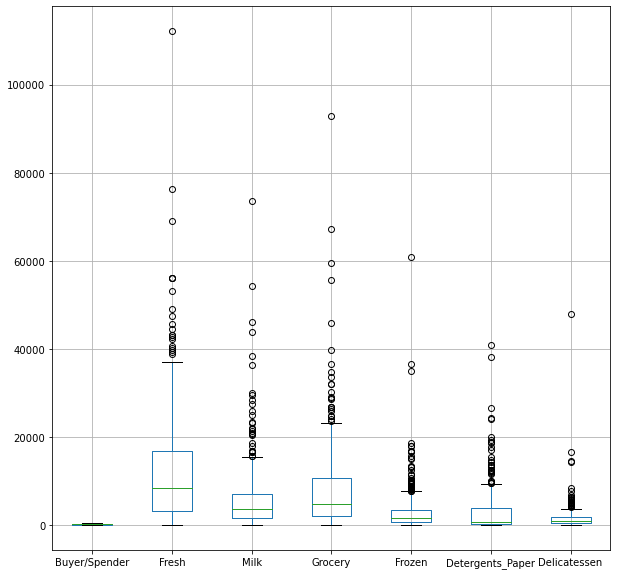

In [72]:
data.boxplot(figsize=(10,10))

From the above box plot we get to understand that which variable is more inconsistent.The maximum outliers the more inconsistent the values are.We can see that Fresh products have more outliers and greatly spread out.Hence this is the most inconsistent.

d.) Descriptive data gives us the mean, median, standard deviation.

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


e.) Finding the coefficientof covariance 

In [74]:
data[nums[1:]].std(numeric_only=True)/data[nums[1:]].mean(numeric_only=True)

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

## OUTLIER TREATMENT AND NEW FEATURE CREATION

QUESTION 8

a.)

<AxesSubplot:>

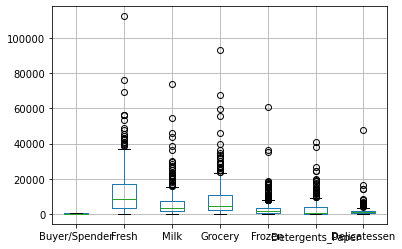

In [22]:
data.boxplot()

Yes there are outliers in the data 

b.Treatment of Outliers

In [23]:
q1_fresh=data['Fresh'].quantile(0.25)

q1_fresh


3127.75

In [24]:
q3_fresh=data['Fresh'].quantile(0.75)

q3_fresh

16933.75

In [25]:
iqr = q3_fresh - q1_fresh
iqr

13806.0

In [26]:
min = q1_fresh-1.5*iqr
min

-17581.25

In [27]:
max=q3_fresh+1.5*iqr
max

37642.75

In [28]:
def remove_outlier(column):
    sorted(column)
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return lower,upper
 


In [29]:
lower,upper=remove_outlier('Fresh')
lower

-17581.25

In [30]:
upper

37642.75

In [31]:
nums = []
cats = []
for i in data.columns:
    if data[i].dtype !='O':
        nums.append(i)
    else:
        cats.append(i)
print(nums)
print(cats)

['Buyer/Spender', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
['Channel', 'Region']


In [32]:
for i in nums:
    lower,upper=remove_outlier(i)
    data[i]=np.where(data[i]>upper,upper,data[i])
    data[i]=np.where(data[i]<lower,lower,data[i])

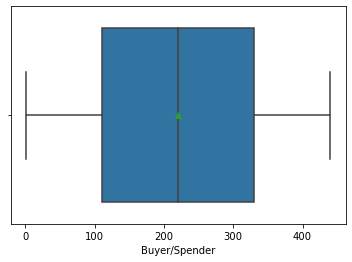

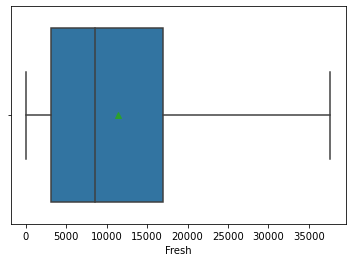

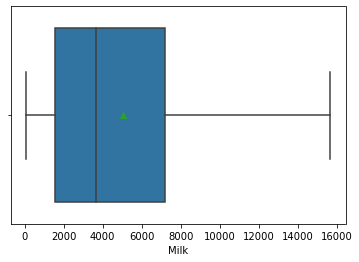

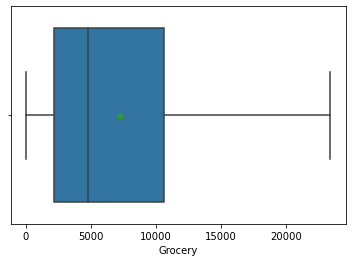

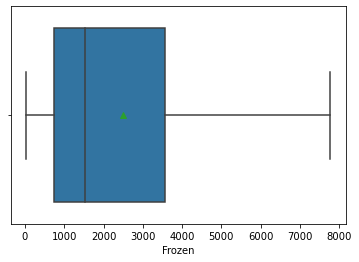

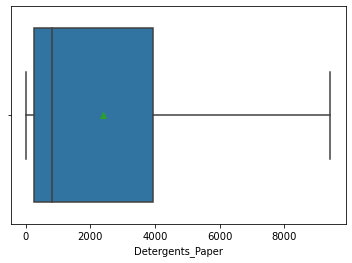

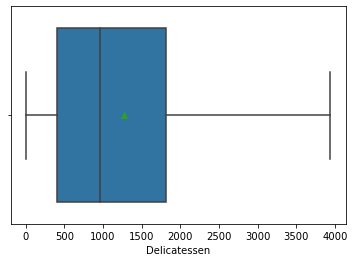

In [33]:
for i in nums:
    sns.boxplot(data[i],showmeans=True)
    plt.show()

QUESTION 9

a.) We create pivot table to just understand aggragate sum and normal sums of all the variables

In [34]:
pd.pivot_table(data, index=['Channel', 'Region'], aggfunc=np.sum)

Buyer/Spender  Delicatessen  Detergents_Paper       Fresh  \
Channel Region                                                              
Hotel   Lisbon        14026.0      67716.25          56081.00   717380.25   
        Oporto         8988.0      29294.25          13516.00   326215.00   
        Other         48020.0     243386.25         165990.00  2701258.50   
Retail  Lisbon         4069.0      30078.50         116648.25    93600.00   
        Oporto         5911.0      23541.00         117226.25   138506.00   
        Other         16006.0     163338.50         583289.75  1020370.25   

                   Frozen      Grocery        Milk  
Channel Region                                      
Hotel   Lisbon  167540.75   237542.000  218195.250  
        Oporto   92852.50   123074.000   63411.125  
        Other   612758.50   820101.000  683347.625  
Retail  Lisbon   45965.25   291474.375  173082.375  
        Oporto   25484.25   261519.625  160251.250  
        Other   158516.50  1450294.000  923092.875

In [35]:
data['Total_Spent']=data[nums[1:]].sum(axis=1)

In [36]:
data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spent
0,1.0,Retail,Other,12669.00,9656.0,7561.000,214.00,2674.000,1338.00,34112.00
1,2.0,Retail,Other,7057.00,9810.0,9568.000,1762.00,3293.000,1776.00,33266.00
2,3.0,Retail,Other,6353.00,8808.0,7684.000,2405.00,3516.000,3938.25,32704.25
3,4.0,Hotel,Other,13265.00,1196.0,4221.000,6404.00,507.000,1788.00,27381.00
4,5.0,Retail,Other,22615.00,5410.0,7198.000,3915.00,1777.000,3938.25,44853.25
...,...,...,...,...,...,...,...,...,...,...
435,436.0,Hotel,Other,29703.00,12051.0,16027.000,7772.25,182.000,2204.00,67939.25
436,437.0,Hotel,Other,37642.75,1431.0,764.000,4510.00,93.000,2346.00,46786.75
437,438.0,Retail,Other,14531.00,15488.0,23409.875,437.00,9419.875,1867.00,65152.75
438,439.0,Hotel,Other,10290.00,1981.0,2232.000,1038.00,168.000,2125.00,17834.00


<AxesSubplot:xlabel='Channel'>

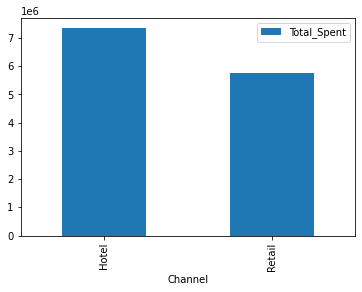

In [37]:
pd.pivot_table(data, index=['Channel'], values=['Total_Spent'],aggfunc=np.sum).plot.bar()

garph between spends and channel

b.)

<AxesSubplot:xlabel='Region'>

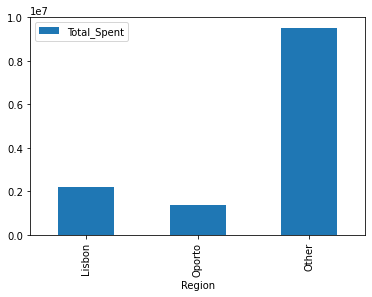

In [38]:
pd.pivot_table(data, index=['Region'], values=['Total_Spent'],aggfunc=np.sum).plot.bar()

graph between total_spent and regions

c.)

<AxesSubplot:xlabel='Channel,Region'>

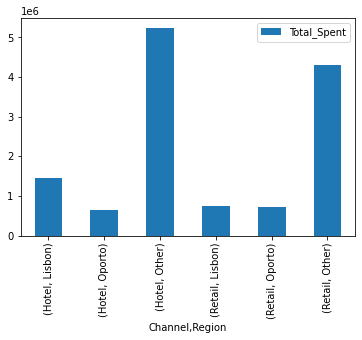

In [39]:
pd.pivot_table(data, index=['Channel','Region'], values=['Total_Spent'],aggfunc=np.sum).plot.bar()

Plot where total_spent against both region and channel

## BIVARIATE ANALYSIS

QUESTION 10 from (a to m)

In [40]:
pd.pivot_table(data,'Fresh',index=['Region','Channel'],margins=True,aggfunc=np.sum)

Fresh
Region Channel            
Lisbon Hotel     717380.25
       Retail     93600.00
Oporto Hotel     326215.00
       Retail    138506.00
Other  Hotel    2701258.50
       Retail   1020370.25
All             4997330.00

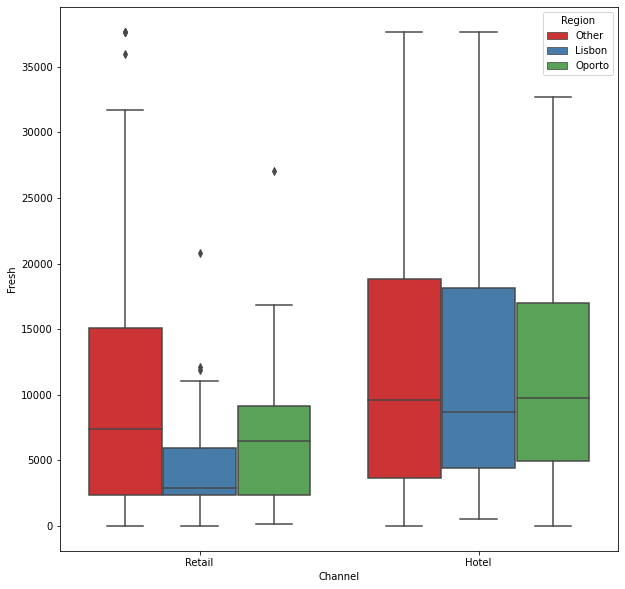

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Channel',y='Fresh',hue='Region',data=data,palette='Set1')
plt.show()

In [42]:
pd.pivot_table(data,'Milk',index=['Region','Channel'],margins=True,aggfunc=np.sum)

Milk
Region Channel             
Lisbon Hotel     218195.250
       Retail    173082.375
Oporto Hotel      63411.125
       Retail    160251.250
Other  Hotel     683347.625
       Retail    923092.875
All             2221380.500

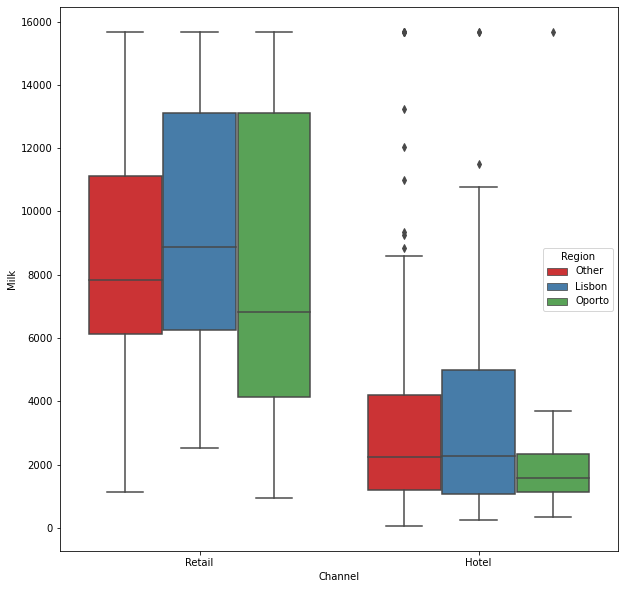

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Channel',y='Milk',hue='Region',data=data,palette='Set1')
plt.show()

In [44]:
pd.pivot_table(data,'Grocery',index=['Region','Channel'],margins=True,aggfunc=np.sum)

Grocery
Region Channel             
Lisbon Hotel     237542.000
       Retail    291474.375
Oporto Hotel     123074.000
       Retail    261519.625
Other  Hotel     820101.000
       Retail   1450294.000
All             3184005.000

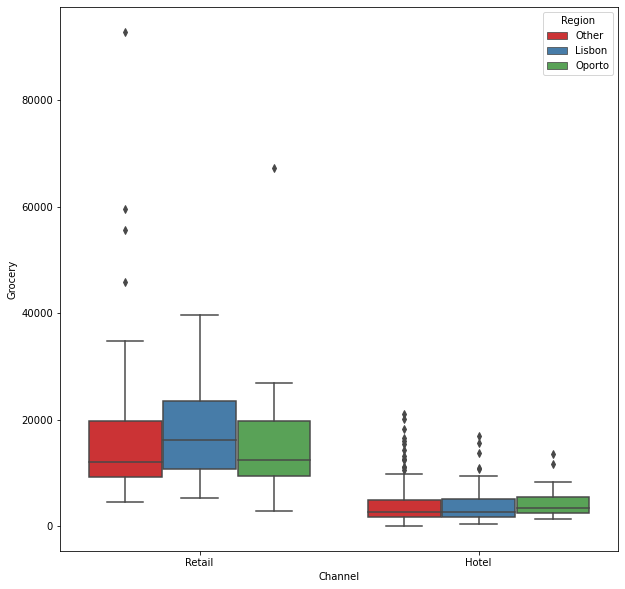

In [75]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Channel',y='Grocery',hue='Region',data=data,palette='Set1')
plt.show()

In [46]:
pd.pivot_table(data,'Frozen',index=['Region','Channel'],margins=True,aggfunc=np.sum)

Frozen
Region Channel            
Lisbon Hotel     167540.75
       Retail     45965.25
Oporto Hotel      92852.50
       Retail     25484.25
Other  Hotel     612758.50
       Retail    158516.50
All             1103117.75

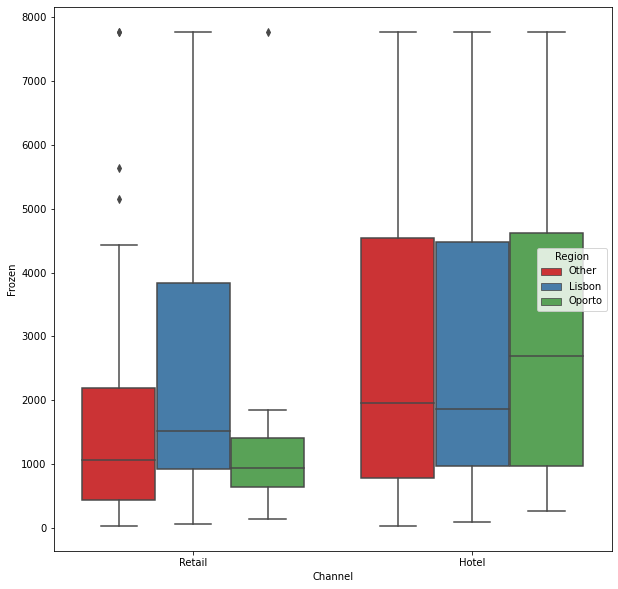

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Channel',y='Frozen',hue='Region',data=data,palette='Set1')
plt.show()

In [48]:
pd.pivot_table(data,'Detergents_Paper',index=['Region','Channel'],margins=True,aggfunc=np.sum)

Detergents_Paper
Region Channel                  
Lisbon Hotel            56081.00
       Retail          116648.25
Oporto Hotel            13516.00
       Retail          117226.25
Other  Hotel           165990.00
       Retail          583289.75
All                   1052751.25

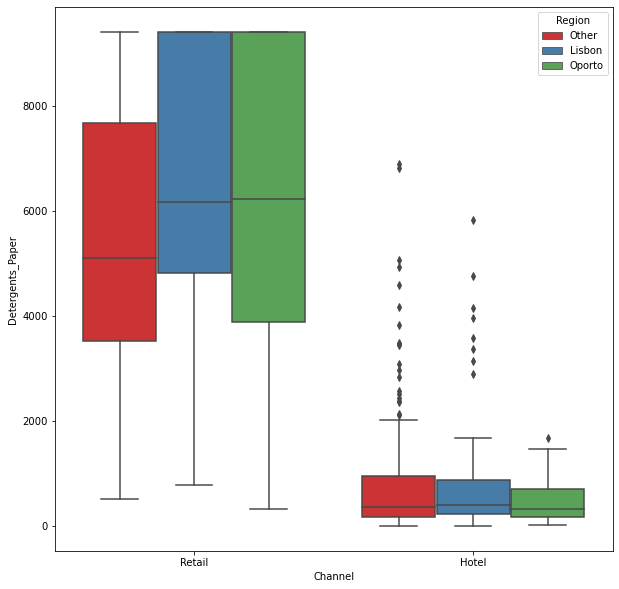

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Channel',y='Detergents_Paper',hue='Region',data=data,palette='Set1')
plt.show()

In [50]:
pd.pivot_table(data,'Delicatessen',index=['Region','Channel'],margins=True,aggfunc=np.sum)

Delicatessen
Region Channel              
Lisbon Hotel        67716.25
       Retail       30078.50
Oporto Hotel        29294.25
       Retail       23541.00
Other  Hotel       243386.25
       Retail      163338.50
All                557354.75

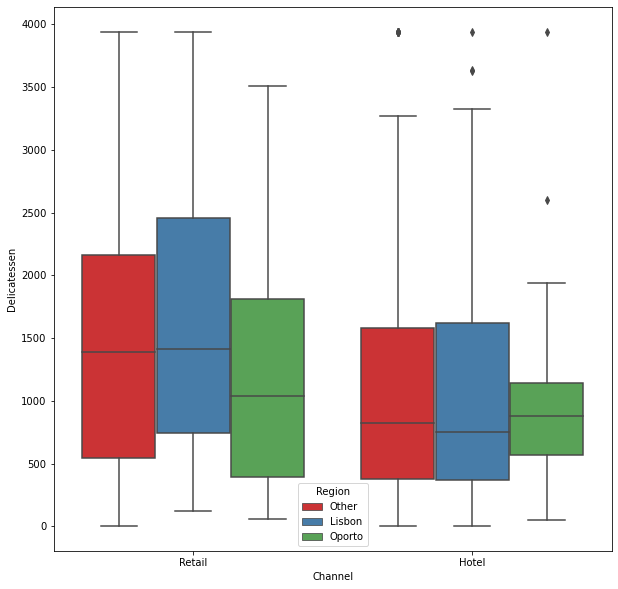

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Channel',y='Delicatessen',hue='Region',data=data,palette='Set1')
plt.show()

<AxesSubplot:>

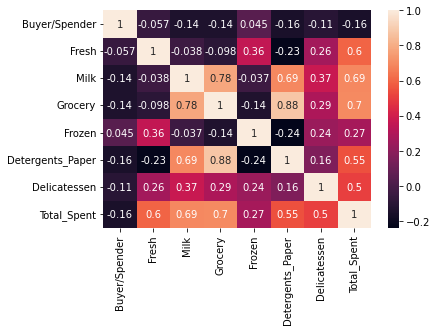

In [52]:
sns.heatmap(data.corr(), annot=True) #Detergent and grocery are highly correlated